# Redes convolucionales

Proyecto PAPIME PE102723

Una red convolucional se caracteriza por la presencia de capas que realizan la operación de convolución de un filtro sobre una capa de entrada, que consiste en un volumen representado una señal: usualmente una imagen.

**Referencias:**
* [Introduction to Deep Learning: What Are Convolutional Neural Networks?](https://www.mathworks.com/videos/introduction-to-deep-learning-what-are-convolutional-neural-networks--1489512765771.html)
* [Convolutional Neural Networks for Visual Recognition](http://cs231n.github.io/convolutional-networks/)

## Convolución

En una dimensión, la convolución está dada por las siguientes ecuaciones:

Convolución:
\begin{align}
 (f * g)(t) &= \int^{\infty}_{-\infty} f(\eta) g(t - \eta) d\eta
\end{align}
donde $-\eta$ provoca un despazamiento e inversión de la función $g$ con respecto a $f$.

Convolución discreta:
\begin{align}
 f[m] * g[m] &= \sum_n f[n] g[m - n]
\end{align}

La convolución es conmutativa
\begin{align}
 f * g = g * f
\end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from ipywidgets import interact, interact_manual
import ipywidgets as widgets

In [2]:
# Sea por ejemplo g:
def g(x):
    return np.piecewise(x, [x <= 0, (x > 0) * (x < 1), x >= 1], [lambda x: 0, lambda x: 1-x, lambda x: 0])
x = np.arange(-2.5, 2.5, 0.01)
gx = g(x)
gp = g(0.5 - x)

In [3]:
@interact(
    t = widgets.FloatSlider(min=-2.5, max=2.5, step=0.1, value=0),
)
def transforma_g(t):
    global gp
    gp = g(t - x)
    plt.plot(x, gx, label="$g(\\eta)$")
    plt.plot(x, gp, label=f"$g({t} + \\eta)$")
    plt.title(f"Corrimiento e inversión con $t={t}$")
    plt.xlabel("$\\eta$")
    plt.ylabel("y")
    plt.legend()

interactive(children=(FloatSlider(value=0.0, description='t', max=2.5, min=-2.5), Output()), _dom_classes=('wi…

Pareciera ser que la función se ha desplazado en la dirección del signo del desplazamiento, pero se encuentra invertida.

### Interpretación

Se utiliza el área bajo la multiplicación en cada $t$ para evaluar qué tan semejantes son $f$ y $g$ invertida.

In [4]:
# Sea por ejemplo f:
def f(x):
    return np.piecewise(x, [x <= 0, (x > 0) * (x < 1), x >= 1], [lambda x: 0, lambda x: 1, lambda x: 0])
fx = f(x)
fg = fx * gp

In [5]:
@interact(
    t = widgets.FloatSlider(min=-2.5, max=2.5, step=0.05, value=0),
)
def producto_fg(t):
    global gp
    gp = g(t - x)
    global fg
    fg = fx * gp
    
    plt.fill_between(x, fg, alpha=0.4)
    plt.plot(x, fx, label="$f(\\eta)$")
    plt.plot(x, gp, label="$g(0.5 + \\eta)$")
    plt.plot(x, fg, label="$f(\\eta)g(0.5 + \\eta)$")
    plt.title(f"Correlación con $t={t}$")
    plt.xlabel("$\\eta$")
    plt.ylabel("y")
    plt.legend()

interactive(children=(FloatSlider(value=0.0, description='t', max=2.5, min=-2.5, step=0.05), Output()), _dom_c…

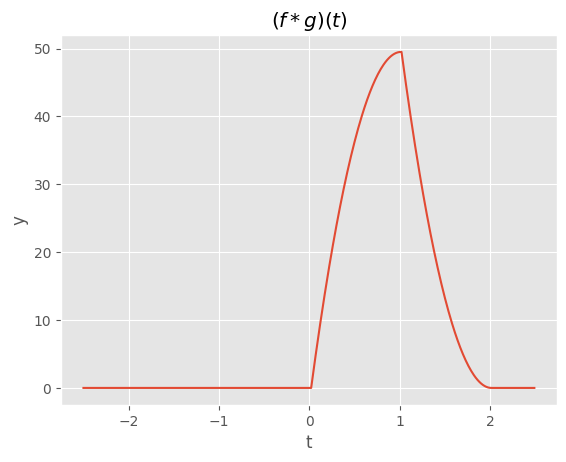

In [7]:
# Para obtener la gráfica, de hecho, usamos la correlación discreta llenando con ceros
# hacia menos y más infinito.
# Esto porque estamos evaluando numéricamente las funciones continuas.
conv = np.convolve(fx, gx, "same")

# (f * g)(t)
plt.fill_between(x, fg, alpha=0.4)
plt.plot(x, conv)
plt.title("$(f * g)(t)$")
plt.xlabel("t")
plt.ylabel("y")
plt.show()

## Convolución en 2D

Se consideran dos señales discretas en 2D $x(n_1, n_2)$ y $h(n_1, n_2)$:

\begin{align}
 x(n_1, n_2) * h(n_1, n_2) = \sum_{k_1=-\infty}^{\infty}  \sum_{k_2=-\infty}^{\infty} x(k_1, k_2) h(n_1 - k_1, n_2 - k_2)
\end{align}

In [8]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

from scipy import signal
from functools import partial

In [9]:
def fdata(title, max_x, max_y, N, min_x = 0, min_y = 0, xlabel="$n_1$", ylabel="$n_2$"):
    def func2d(ax, title, max_x, max_y, N, min_x = 0, min_y = 0, xlabel="$n_1$", ylabel="$n_2$"):
        """
        Grafica la función discreta 2D
        """
        X = np.arange(min_x, max_x, 1)
        Y = np.arange(min_y, max_y, 1)
        X, Y = np.meshgrid(X, Y)

        ax.scatter(X, Y)
        ax.set_title(title)

        for i, row in enumerate(N):
            for j, col in enumerate(row):
                ax.annotate(col, (X[i,j], Y[i,j]), fontsize=17)

        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
    return partial(func2d, title=title, max_x=max_x, max_y=max_y, N=N, min_x = min_x, min_y = min_y, xlabel=xlabel, ylabel=ylabel)
    
def ejemplo_conv(funciones, ax_xmax = 5, ax_ymax = 5, ax_xmin = 0, ax_ymin = 0):
    """
    Genera las matrices y grafica las funciones para un ejemplo de
    convolución.
    """
    num_funcs = len(funciones)
    fig, axis = plt.subplots(1, num_funcs, figsize=(3 * num_funcs, 3))
    
    for i, fun in enumerate(funciones):
        ax = axis[i]
        fun(ax)
            
        ax.axhline(0, color='grey', linewidth=1)
        ax.axvline(0, color='grey', linewidth=1)
        ax.set_xticks(range(-1 + ax_xmin, ax_xmax))
        ax.set_yticks(range(-1 + ax_ymin, ax_ymax))

x(n_1,n_2) = 
 [[1 1 1]
 [1 1 1]]
h(n_1,n_2) = 
 [[1 1]
 [1 1]
 [1 1]]
x ** h = 
 [[1 2 2 1]
 [2 4 4 2]
 [2 4 4 2]
 [1 2 2 1]]


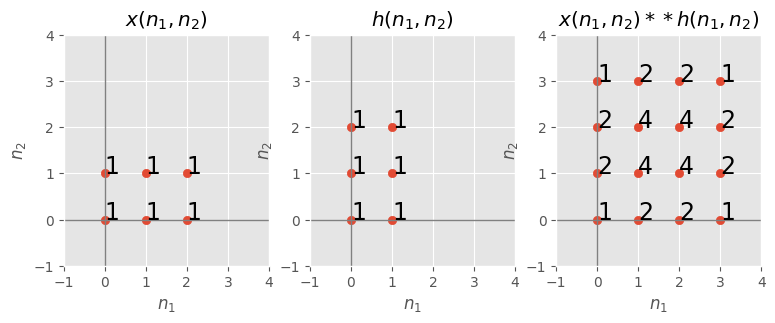

In [13]:
# Ejemplo

x = np.ones((2,3), dtype=int)
h = np.ones((3,2), dtype=int)
c = signal.convolve2d(x, h, mode='full', boundary='fill', fillvalue=0)
print("x(n_1,n_2) = \n", x)
print("h(n_1,n_2) = \n", h)
print("x ** h = \n", c)

ejemplo_conv([fdata("$x(n_1,n_2)$", 3, 2, x),
              fdata("$h(n_1,n_2)$", 2, 3, h),
              fdata("$x(n_1,n_2) ** h(n_1,n_2)$", 4, 4, c)])

## Convolución en imágenes

Al realizar la convolución de una imagen $x(n_1,n_2)$ con una matriz más pequeña $h(n_1,n_2)$, esta funge como filtro y obtenemos información particular acerca de la imagen.

![Convolución2D](figuras/luna_peque.jpg "Convolución 2D")

In [17]:
from PIL import Image

Forma de la matriz imagen:  (116, 87, 3)


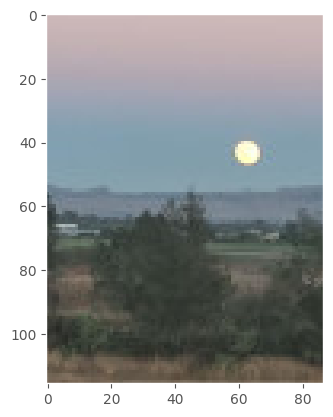

In [29]:
np_img = np.asarray(Image.open('figuras/luna_peque.jpg'))
print("Forma de la matriz imagen: ", np_img.shape)
plt.grid(False)
imgplot = plt.imshow(np_img)

In [19]:
# FILTROS
#
# Más filtros sugeridos en:
# https://beej.us/blog/data/convolution-image-processing/

gradient = np.array([[ -3-3j, 0-10j,  +3 -3j],
                   [-10+0j, 0+ 0j, +10 +0j],
                   [ -3+3j, 0+10j,  +3 +3j]]) # Gx + j*Gy
blur = np.ones((3,3))/9
emboss = np.array([[-18,-9,0],[-9,9,9],[0,9,18]])/9
mikes = np.array([[2,22,1], [22,1,-22], [1,-22,-2]])/9

In [35]:
@interact(
    nombre_filtro = widgets.SelectionSlider(
        options=['gradient', 'blur', 'emboss', 'mikes'],
        value='emboss'
    )
)
def muestra_filtrada(nombre_filtro):
    filtro = globals()[nombre_filtro]
    print(filtro)
    img_filtrada = np.zeros(np_img.shape, dtype=complex)
    for i in range(3):
        img_filtrada[:,:,i] = signal.convolve2d(np_img[:,:,i],
                                                            filtro,
                                                            boundary='symm',
                                                            mode='same')
    fig, (ax_mag, ax_ang) = plt.subplots(1, 2)
    ax_mag.grid(False)
    ax_mag.imshow(np.absolute(img_filtrada).astype(int))
    ax_mag.set_title(nombre_filtro)
    ax_ang.imshow(np.angle(img_filtrada), cmap='hsv') # hsv is cyclic, like angles
    ax_ang.grid(False)

interactive(children=(SelectionSlider(description='nombre_filtro', index=2, options=('gradient', 'blur', 'embo…

# Datos

Utilizaremos el conjunto de datos [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html)
Es necesario descargarlos dentro de una carpeta 'datos', dejar ahí el archivo comprimido para la sección siguiente y descomprimirlo para analizar su estructura en esta sección.

Cifar contiene **60,000** imágenes de $32 \times 32$ pixeles, para 10 clases de objetos.
$50,000$ son para entrenamiento y $10,000$ para pruebas (este último se puede subdividir cuando sea necesario contar con un conjunto de validación y otro de prueba).files_in_cifar = ['batches.meta',
                  'data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5',
                  'test_batch']
files_in_cifar = ["data/cifar-10-batches-py/" + file_name for file_name in files_in_cifar]

In [21]:
archivos_en_cifar = ['batches.meta',
                     'data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5',
                     'test_batch']
archivos_en_cifar = ["data/cifar-10-batches-py/" + nombre_archivo for nombre_archivo in archivos_en_cifar]

In [23]:
# Clases
#
# Incluye los datos:
# b'num_cases_per_batch': 10000,
# b'num_vis': 3072 y
# b'label_names', que es la única que usaremos por ahora
with open(archivos_en_cifar[0], 'rb') as fo:
    import pickle
    label_names = pickle.load(fo, encoding='bytes')
    label_names = [name.decode('utf-8') for name in label_names[b'label_names']]
classes = tuple(label_names)
print("Labels: ", classes)

Labels:  ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [24]:
def unpickle(file):
    """ Decodifica los datos para un lote.
    Estos vienen en forma de diccionarios.
    """
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
        print("Loaded", dict[b'batch_label'].decode('utf-8'))
    return dict

In [25]:
# Un diccionario de lote contiene las llaves [b'batch_label', b'labels', b'data', b'filenames']
# data:   arreglo de 10000x3072 uint8S.  1 ejemplar por renglón. 3D-RGB Row-major.
# labels: las clasificaciones a las que pertenecen.
cifar_train_batch = unpickle(archivos_en_cifar[1])
X_train = cifar_train_batch[b'data']
Y_train = cifar_train_batch[b'labels']

Loaded training batch 1 of 5


In [36]:
@interact(
    índice = (0, len(X_train) - 1)
)
def muestraImagenEntrenamiento(índice):
    data = X_train[índice]
    label = Y_train[índice]
    data = data.reshape((3,32,32))
    #print(data.shape, data)
    new_data = np.zeros((32,32,3), float)
    new_data[:,:,0] = data[0]/255
    new_data[:,:,1] = data[1]/255
    new_data[:,:,2] = data[2]/255
    #print(new_data)
    plt.figure(figsize = (2,2))
    plt.imshow(new_data)
    plt.grid(False)
    plt.title(label_names[label])

interactive(children=(IntSlider(value=4999, description='índice', max=9999), Output()), _dom_classes=('widget-…

## Red convolucional con Torchvision

https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [39]:
# !pip3 install torchvision

In [40]:
import torch
import torchvision
import torchvision.transforms as transforms

from torch.utils.data.sampler import SubsetRandomSampler

from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [41]:
# Torchvision devuelve imágenes en el rango [0, 1]
# Necesitamos tensores en [-1,1].
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [44]:
def imshow(img):
    """
    Muestra una imagen que sale de la red.
    """
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.grid(False)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [42]:
# Conjuntos de datos

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


Parámetros para la capa convolucional:

* *kernel size*: tamaño del filtro.
* *kernel tipe*: los valores del filtro, casos particulares son la identidad, detección de bordes, afinar, blur, etc.
* *strides* o *saltos*: distance recorrida entre aplicaciones sucesivas del núcleo.
* *padding*: técnica para agregar datos a las orillas de la imagen.
* *output layers*: número de núcleos distintos que serán aplicados a la imagen.

* input: [batch, in_height, in_width, in_channels]

In [45]:
# Entrenamiento
n_training_samples = 20000
train_sampler = SubsetRandomSampler(np.arange(n_training_samples, dtype=np.int64))

# Validación
n_val_samples = 5000
val_sampler = SubsetRandomSampler(np.arange(n_training_samples, n_training_samples + n_val_samples, dtype=np.int64))

# Prueba
n_test_samples = 5000
test_sampler = SubsetRandomSampler(np.arange(n_test_samples, dtype=np.int64))

### Arquitectura

<img src="./figuras/Tutorial.png"/>

In [46]:
class SimpleCNN(nn.Module):
    
    #Our batch shape for input x is (3, 32, 32)
    
    def __init__(self):
        super(SimpleCNN, self).__init__()
        
        #Input channels = 3, output channels = 18
        self.conv1 = torch.nn.Conv2d(3, 18, kernel_size=3, stride=1, padding=1)
        self.pool = torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        #4608 input features, 64 output features (see sizing flow below)
        self.fc1 = torch.nn.Linear(18 * 16 * 16, 64)
        
        #64 input features, 10 output features for our 10 defined classes
        self.fc2 = torch.nn.Linear(64, 10)
        
    def forward(self, x):
        
        #Computes the activation of the first convolution
        #Size changes from (3, 32, 32) to (18, 32, 32)
        x = F.relu(self.conv1(x))
        
        #Size changes from (18, 32, 32) to (18, 16, 16)
        x = self.pool(x)
        
        #Reshape data to input to the input layer of the neural net
        #Size changes from (18, 16, 16) to (1, 4608)
        #Recall that the -1 infers this dimension from the other given dimension
        x = x.view(-1, 18 * 16 *16)
        
        #Computes the activation of the first fully connected layer
        #Size changes from (1, 4608) to (1, 64)
        x = F.relu(self.fc1(x))
        
        #Computes the second fully connected layer (activation applied later)
        #Size changes from (1, 64) to (1, 10)
        x = self.fc2(x)
        return(x)

# Entrenamiento

In [47]:
import torch.optim as optim

def train(self):
    
    criterion = nn.CrossEntropyLoss()
    #optimizer = optim.SGD(self.parameters(), lr=0.001, momentum=0.9)
    optimizer = torch.optim.Adam(self.parameters())
    
    for epoch in range(2):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0

    print('Finished Training')
    
setattr(SimpleCNN, 'train', train)

In [48]:
net = SimpleCNN()

In [49]:
##
# Si tienes GPUs e instalaste PyTorch para GPUs:
##

# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# print(device)
# net.to(device)
# inputs, labels = data[0].to(device), data[1].to(device)

# Más aún, revisa:
# https://pytorch.org/tutorials/beginner/blitz/data_parallel_tutorial.html

In [50]:
@interact_manual()
def entrena():
    net.train()

interactive(children=(Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widge…

In [51]:
# Guardar el modelo

@interact_manual()
def guarda_modelo():
    PATH = './cifar_net.pth'
    torch.save(net.state_dict(), PATH)

interactive(children=(Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widge…

In [52]:
# Cargamos los parámetros entrenados en el otro cuaderno

@interact_manual()
def guarda_modelo():
    PATH = './data/cifar_net.pth'
    r = net.load_state_dict(torch.load(PATH))
    print(r)

interactive(children=(Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widge…

## Prueba

GroundTruth:  cat   ship  ship  airplane
Predicted:  airplane:5s horse:5s deer:5s airplane:5s


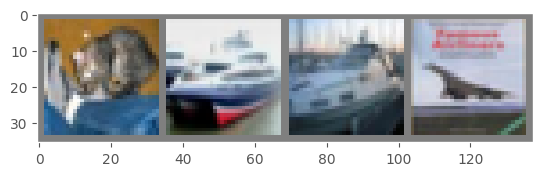

In [53]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

outputs = net(images)
_, predicted = torch.max(outputs, 1)  # Mayor probabilidad

print('Predicted: ', ' '.join(f'{classes[predicted[j]]}:5s'
                              for j in range(4)))

In [54]:
# 4 imágenes, 3 canales, 32x32 pixeles
print(images.shape)

torch.Size([4, 3, 32, 32])


In [55]:
# Exactitud

correct = 0
total = 0
# si no hay entrenamiento, no se necesita el gradiente
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # evalúa sobre todas las imágenes
        outputs = net(images)
        # selecciona la clase con mayor probabilidad
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Exactitud de la red en las 10000 imágenes de prueba: {100 * correct // total} %')

Exactitud de la red en las 10000 imágenes de prueba: 10 %


In [56]:
# Clase por clase

# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Exactitud por clase: {classname:5s} is {accuracy:.1f} %')

Exactitud por clase: airplane is 58.5 %
Exactitud por clase: automobile is 0.0 %
Exactitud por clase: bird  is 4.4 %
Exactitud por clase: cat   is 0.2 %
Exactitud por clase: deer  is 35.2 %
Exactitud por clase: dog   is 0.0 %
Exactitud por clase: frog  is 0.0 %
Exactitud por clase: horse is 0.9 %
Exactitud por clase: ship  is 3.1 %
Exactitud por clase: truck is 0.0 %


In [ ]:
# TODO: Imprimir filtros.